In [31]:
# MXNet, ResNet-152, 11,221 labels
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import wget
import numpy as np
import mxnet as mx
from PIL import Image, ImageOps
from urllib.request import urlretrieve
from collections import namedtuple
Batch = namedtuple('Batch', ['data'])

In [32]:
# Download Model: ResNet-152 (This has 11,221 labels)
#path='http://data.mxnet.io/models/imagenet-11k/'
#wget.download(path+'resnet-152/resnet-152-symbol.json')
#wget.download(path+'resnet-152/resnet-152-0000.params')

In [33]:
# Open downloaded labels (11,221)
urlretrieve("http://data.mxnet.io/models/imagenet-11k/synset.txt", "synset.txt")

with open('synset.txt', 'r') as f:
    LABELS = [l.rstrip() for l in f]  
    
print("Label length: ", len(LABELS))

Label length:  11221


In [4]:
# Load MXNet model
sym, arg_params, aux_params = mx.model.load_checkpoint('resnet-152', 0)

In [5]:
# Create model
mod = mx.mod.Module(symbol=sym, context=mx.cpu())
mod.bind(for_training=False, data_shapes=[('data', (1,3,224,224))])
mod.set_params(arg_params, aux_params)

In [16]:
def get_image(url):
    return urlretrieve(url)[0]

In [25]:
def predict(filename, mod, synsets):
    
    # Load image and resize    
    img = Image.open(filename)
    # Centre crop
    img = ImageOps.fit(img, (224, 224), Image.ANTIALIAS)
    
    # Show image
    plt.imshow(img)
    plt.axis('off')

    img_np = np.swapaxes(img, 0, 2)
    img_np = np.swapaxes(img_np, 1, 2) 
    img_np = img_np[np.newaxis, :] 
    
    mod.forward(Batch([mx.nd.array(img_np)]))
    prob = mod.get_outputs()[0].asnumpy()
    prob = np.squeeze(prob)

    a = np.argsort(prob)[-1]    
    predicted_category = " ".join(synsets[a].split(" ")[1:])
    print(predicted_category)

kitten, kitty
kitten, kitty
kitten, kitty
kitten, kitty
1 loop, best of 3: 3.58 s per loop


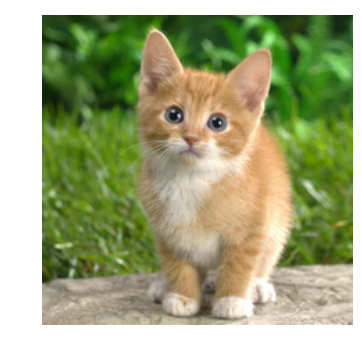

In [26]:
%timeit predict(get_image("http://writm.com/wp-content/uploads/2016/08/Cat-hd-wallpapers.jpg"), mod, LABELS)

oxeye daisy, ox-eyed daisy, marguerite, moon daisy, white daisy, Leucanthemum vulgare, Chrysanthemum leucanthemum
oxeye daisy, ox-eyed daisy, marguerite, moon daisy, white daisy, Leucanthemum vulgare, Chrysanthemum leucanthemum
oxeye daisy, ox-eyed daisy, marguerite, moon daisy, white daisy, Leucanthemum vulgare, Chrysanthemum leucanthemum
oxeye daisy, ox-eyed daisy, marguerite, moon daisy, white daisy, Leucanthemum vulgare, Chrysanthemum leucanthemum
1 loop, best of 3: 2.93 s per loop


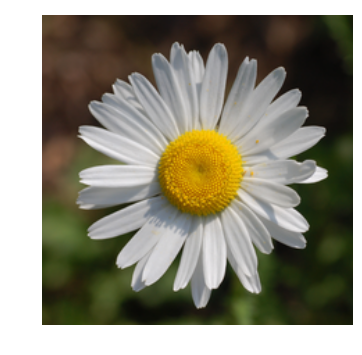

In [27]:
%timeit predict(get_image("https://thesecondachilles.files.wordpress.com/2014/10/daisy.jpg"), mod, LABELS)

hippopotamus, hippo, river horse, Hippopotamus amphibius
hippopotamus, hippo, river horse, Hippopotamus amphibius
hippopotamus, hippo, river horse, Hippopotamus amphibius
hippopotamus, hippo, river horse, Hippopotamus amphibius
1 loop, best of 3: 3.22 s per loop


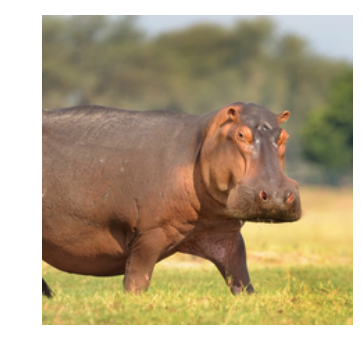

In [28]:
%timeit predict(get_image("http://www.awf.org/sites/default/files/media/gallery/wildlife/Hippo/Hipp_joe.jpg"), mod, LABELS)

sausage dog, sausage hound
sausage dog, sausage hound
sausage dog, sausage hound
sausage dog, sausage hound
1 loop, best of 3: 2.97 s per loop


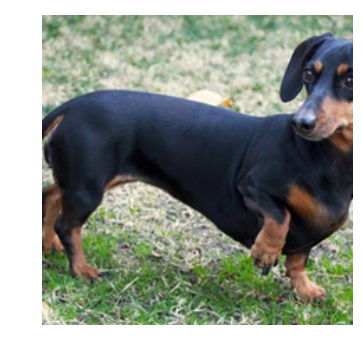

In [29]:
%timeit predict(get_image("http://lovedachshund.com/wp-content/uploads/2016/06/short-haired-dachshund.jpg"), mod, LABELS)

hedgehog, Erinaceus europaeus, Erinaceus europeaeus
hedgehog, Erinaceus europaeus, Erinaceus europeaeus
hedgehog, Erinaceus europaeus, Erinaceus europeaeus
hedgehog, Erinaceus europaeus, Erinaceus europeaeus
1 loop, best of 3: 3.19 s per loop


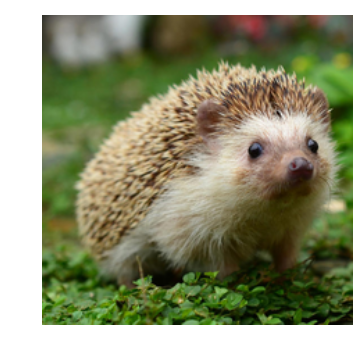

In [30]:
%timeit predict(get_image("http://images.mentalfloss.com/sites/default/files/styles/insert_main_wide_image/public/istock_000048297906_small.jpg"), mod, LABELS)